In [6]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:

df = pd.read_excel('adidas.xlsx')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


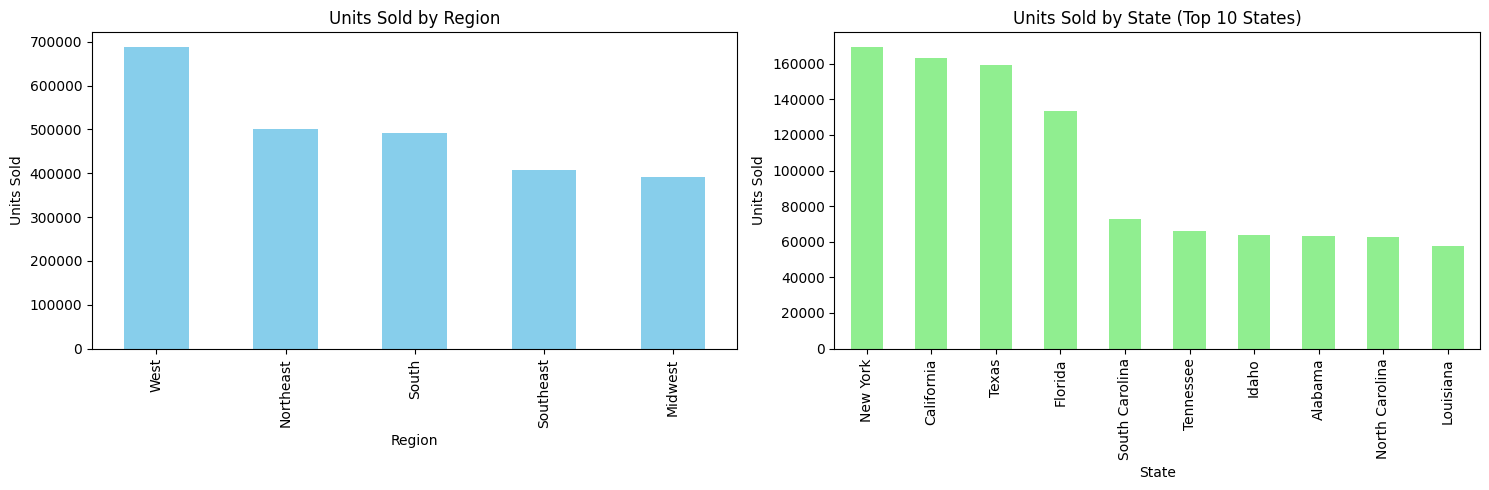

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 1. Grouped by Region
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Units Sold by Region')
axes[0].set_ylabel('Units Sold')

# 2. Grouped by State (Top 10 States)
df.groupby('State')['Units Sold'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Units Sold by State (Top 10 States)')
axes[1].set_ylabel('Units Sold')

plt.tight_layout()
plt.show()

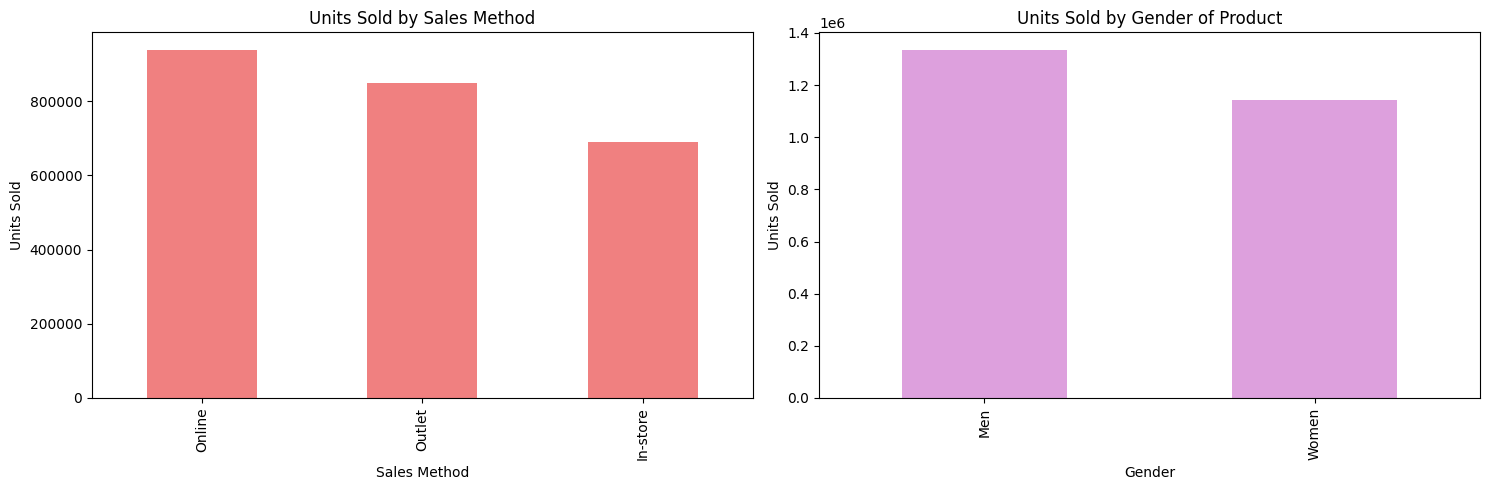

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 3. Grouped by Sales Method
df.groupby('Sales Method')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('Units Sold by Sales Method')
axes[0].set_ylabel('Units Sold')

# 4. Grouped by Gender of Product
df['Gender'] = 'Unisex'
df.loc[df['Product'].str.contains("Men's"), 'Gender'] = 'Men'
df.loc[df['Product'].str.contains("Women's"), 'Gender'] = 'Women'
df.groupby('Gender')['Units Sold'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='plum')
axes[1].set_title('Units Sold by Gender of Product')
axes[1].set_ylabel('Units Sold')

plt.tight_layout()
plt.show()

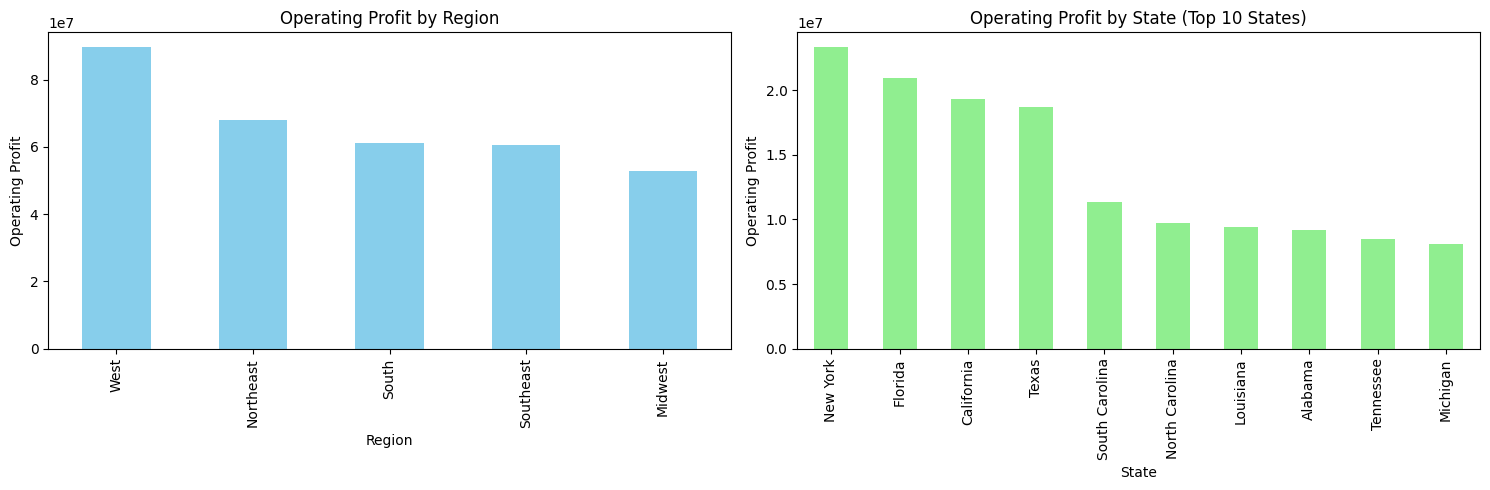

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.groupby('Region')['Operating Profit'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Operating Profit by Region')
axes[0].set_ylabel('Operating Profit')



df.groupby('State')['Operating Profit'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Operating Profit by State (Top 10 States)')
axes[1].set_ylabel('Operating Profit')


plt.tight_layout()
plt.show()

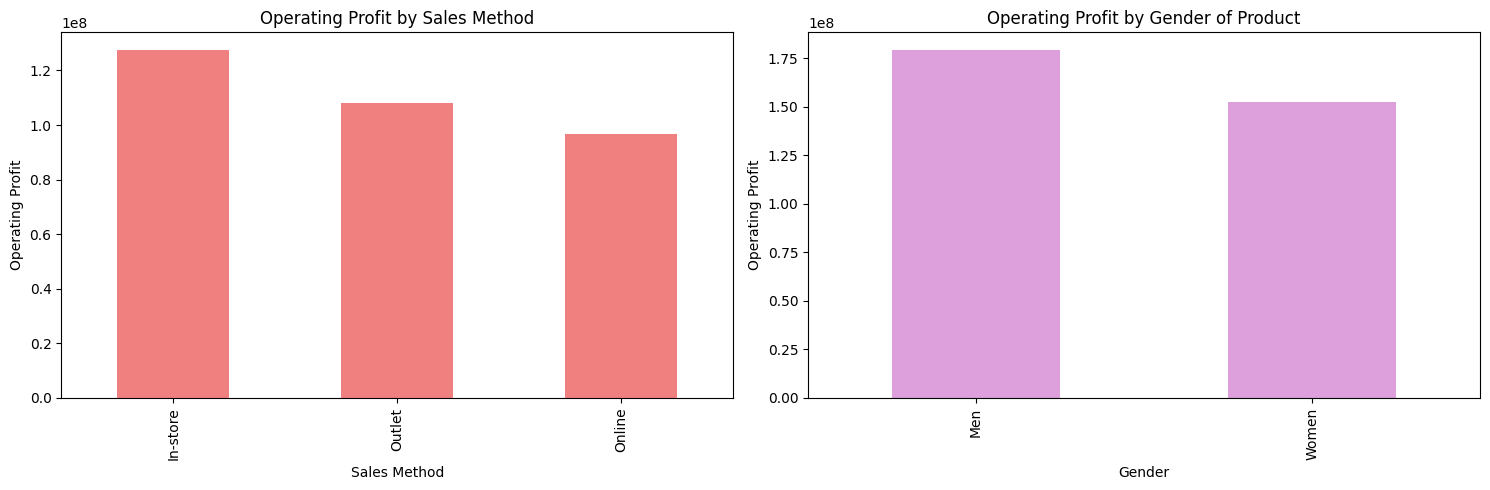

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.groupby('Sales Method')['Operating Profit'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('Operating Profit by Sales Method')
axes[0].set_ylabel('Operating Profit')


df.groupby('Gender')['Operating Profit'].sum().sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='plum')
axes[1].set_title('Operating Profit by Gender of Product')
axes[1].set_ylabel('Operating Profit')
plt.tight_layout()
plt.show()

<ipython-input-20-a971b2f97431>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


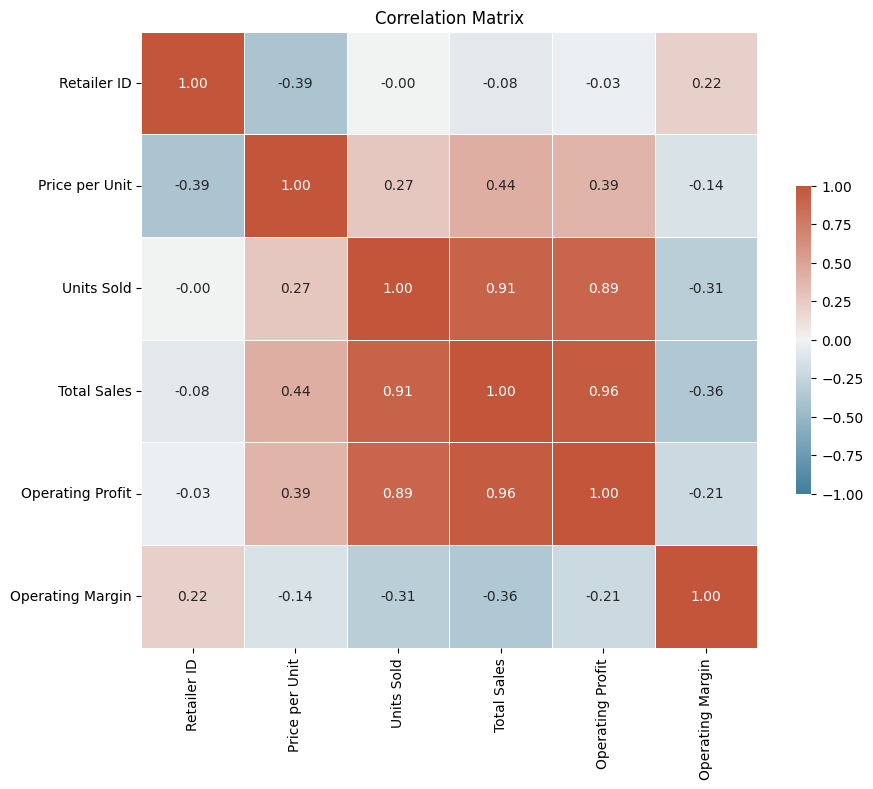

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.show()

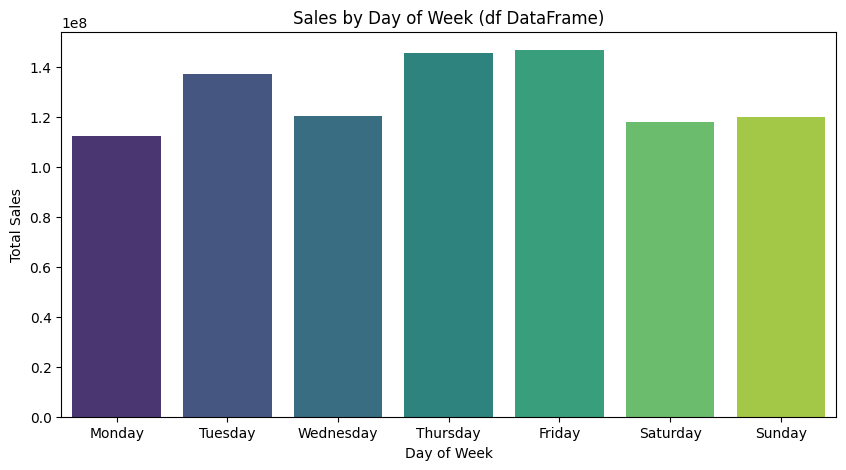

In [ ]:
# 1. Sales by Day of the Week for df DataFrame
df['Day of Week'] = df['Invoice Date'].dt.dayofweek
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day of Week'] = df['Day of Week'].map(days)

# Grouping the data by day of the week and summing the "Total Sales"
sales_by_day_of_week_df = df.groupby('Day of Week')['Total Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Creating a bar plot to visualize sales by day of the week
plt.figure(figsize=(10, 5))
sales_by_day_of_week_plot_df = sns.barplot(x=sales_by_day_of_week_df.index, y=sales_by_day_of_week_df.values, palette="viridis")
sales_by_day_of_week_plot_df.set_title('Sales by Day of Week (df DataFrame)')
sales_by_day_of_week_plot_df.set_ylabel('Total Sales')
plt.show()

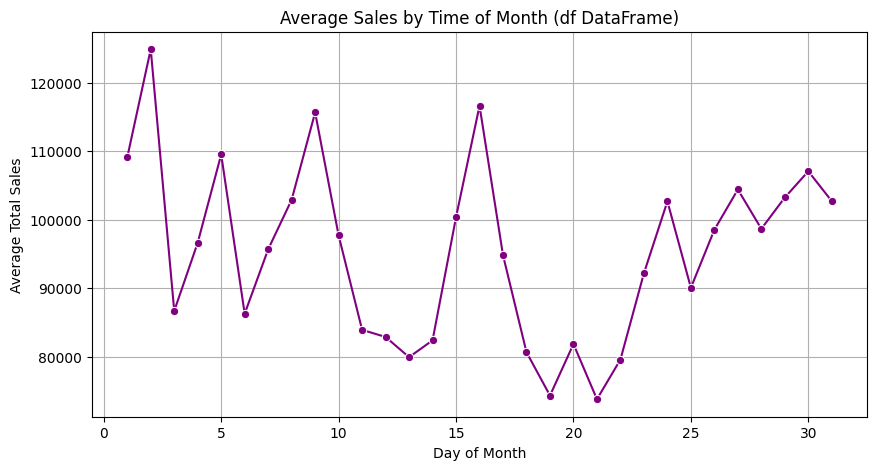

In [ ]:
# 2. Sales by Time of Month for df DataFrame
df['Day of Month'] = df['Invoice Date'].dt.day

# Grouping the data by day of the month and summing the "Total Sales"
sales_by_time_of_month_df = df.groupby('Day of Month')['Total Sales'].mean()

# Creating a line plot to visualize sales trends throughout the month
plt.figure(figsize=(10, 5))
sales_by_time_of_month_plot_df = sns.lineplot(x=sales_by_time_of_month_df.index, y=sales_by_time_of_month_df.values, marker='o', linestyle='-', color='purple')
sales_by_time_of_month_plot_df.set_title('Average Sales by Time of Month (df DataFrame)')
sales_by_time_of_month_plot_df.set_ylabel('Average Total Sales')
sales_by_time_of_month_plot_df.set_xlabel('Day of Month')
plt.grid(True)
plt.show()

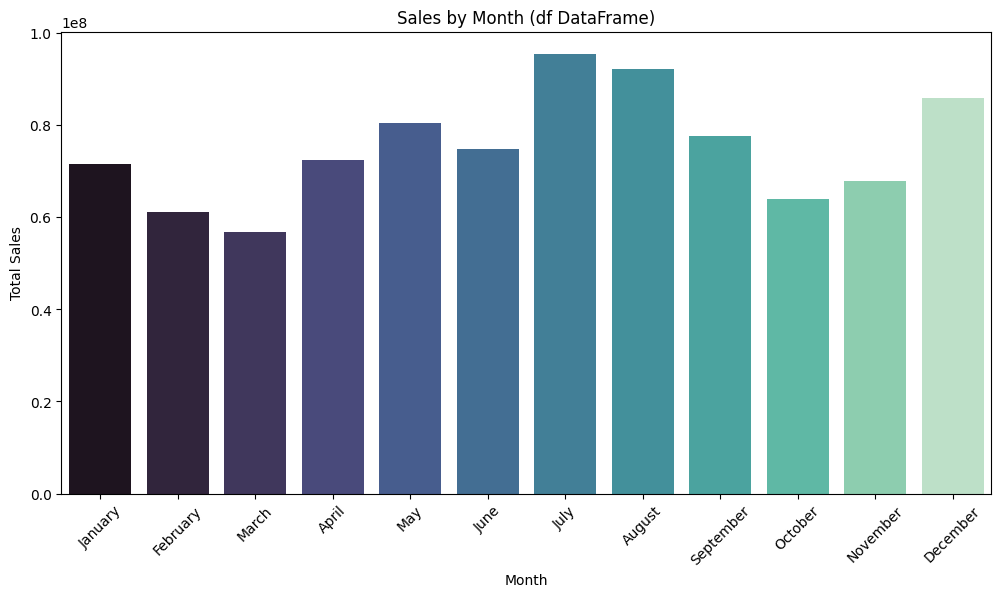

In [ ]:
# 1. Sales by Month for df DataFrame
df['Month'] = df['Invoice Date'].dt.month

# Mapping the month to actual names for better readability
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['Month'] = df['Month'].map(months)

# Grouping the data by month and summing the "Total Sales"
sales_by_month_df = df.groupby('Month')['Total Sales'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Creating a bar plot to visualize sales by month
plt.figure(figsize=(12, 6))
sales_by_month_plot_df = sns.barplot(x=sales_by_month_df.index, y=sales_by_month_df.values, palette="mako")
sales_by_month_plot_df.set_title('Sales by Month (df DataFrame)')
sales_by_month_plot_df.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Assuming your DataFrame is called 'df' and the column name is 'Invoice Date'
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])


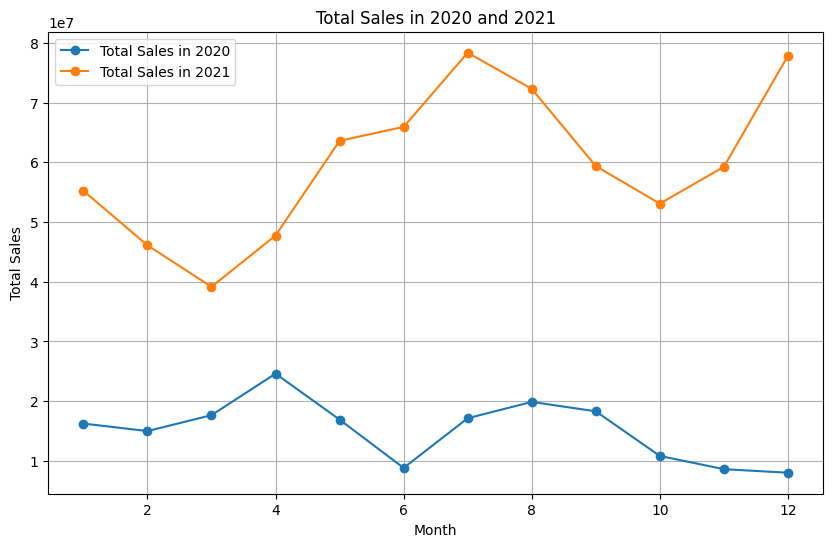

In [19]:
# Extract the year and month from the "Invoice Date" column
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month

# Filter data for the years 2020 and 2021
df_2020 = df[df['Year'] == 2020]
df_2021 = df[df['Year'] == 2021]

# Group by month and sum the total sales for 2020 and 2021
total_sales_2020 = df_2020.groupby('Month')['Total Sales'].sum()
total_sales_2021 = df_2021.groupby('Month')['Total Sales'].sum()

# Create a plot to visualize the data
plt.figure(figsize=(10, 6))
plt.plot(total_sales_2020.index, total_sales_2020, label='Total Sales in 2020', marker='o')
plt.plot(total_sales_2021.index, total_sales_2021, label='Total Sales in 2021', marker='o')

plt.title('Total Sales in 2020 and 2021')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


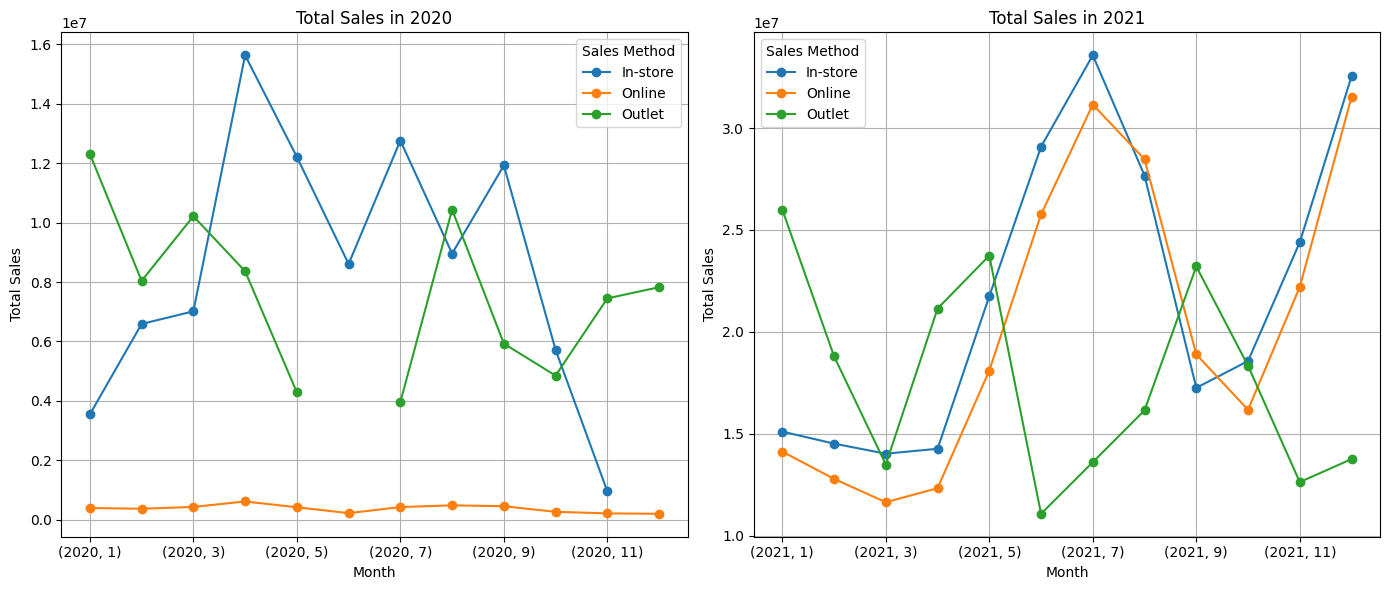

In [20]:


# Group by month and Sales Method and sum the total sales for 2020 and 2021
total_sales_2020 = df_2020.groupby(['Year', 'Month', 'Sales Method'])['Total Sales'].sum().unstack()
total_sales_2021 = df_2021.groupby(['Year', 'Month', 'Sales Method'])['Total Sales'].sum().unstack()

# Create separate plots for 2020 and 2021
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 2020
total_sales_2020.plot(ax=ax1, marker='o')
ax1.set_title('Total Sales in 2020')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales')
ax1.grid(True)
ax1.legend(title='Sales Method')

# Plot for 2021
total_sales_2021.plot(ax=ax2, marker='o')
ax2.set_title('Total Sales in 2021')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales')
ax2.grid(True)
ax2.legend(title='Sales Method')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [25]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your Adidas sales data

# Convert the "Invoice Date" column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the year and month from the "Invoice Date" column
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month

# Filter the data for June 2020 and "Online" Sales Method
june_2020_online = df[(df['Year'] == 2020) & (df['Month'] == 5) & (df['Retailer'] == 'Sports Direct')]
june_2020_online


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month
782,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Men's Street Footwear,65.0,1075,698750.0,314437.50,0.45,In-store,2020,5
783,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Men's Athletic Footwear,55.0,875,481250.0,168437.50,0.35,In-store,2020,5
784,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Women's Street Footwear,55.0,825,453750.0,113437.50,0.25,In-store,2020,5
785,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Women's Athletic Footwear,55.0,775,426250.0,127875.00,0.30,In-store,2020,5
4670,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Men's Street Footwear,63.0,323,20349.0,11395.44,0.56,Online,2020,5
4671,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Men's Athletic Footwear,51.0,254,12954.0,6088.38,0.47,Online,2020,5
4672,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Women's Street Footwear,52.0,248,12896.0,4771.52,0.37,Online,2020,5
4673,Sports Direct,1185732,2020-05-24,Southeast,Florida,Miami,Women's Athletic Footwear,54.0,209,11286.0,4852.98,0.43,Online,2020,5


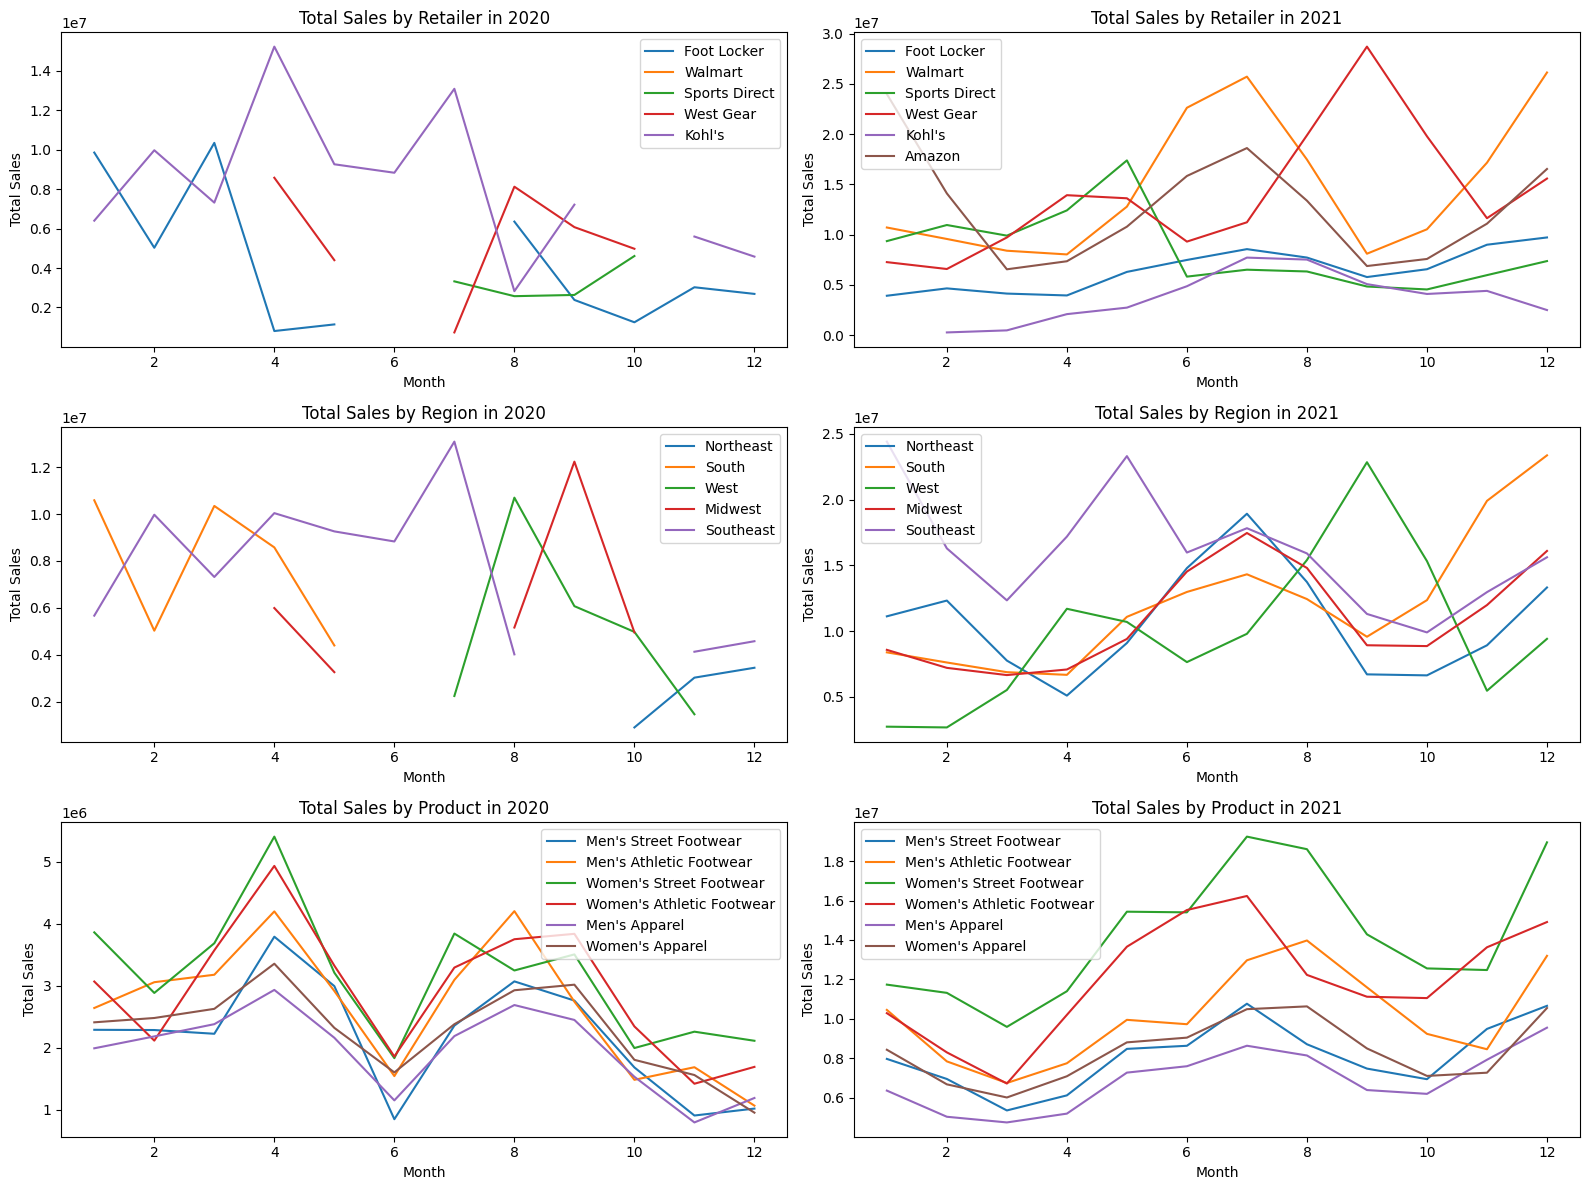

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your Adidas sales data

# Convert the "Invoice Date" column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the year and month from the "Invoice Date" column
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month

# Create subplots for each analysis
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Define unique values for Retailer, Region, and Product
unique_retailers = df['Retailer'].unique()
unique_regions = df['Region'].unique()
unique_products = df['Product'].unique()

# Plot total sales by Retailer for each year
for i, year in enumerate([2020, 2021]):
    df_year = df[df['Year'] == year]
    total_sales_by_month_retailer = df_year.groupby(['Month', 'Retailer'])['Total Sales'].sum().unstack()
    total_sales_by_month_retailer.plot(ax=axes[0, i])
    axes[0, i].set_title(f'Total Sales by Retailer in {year}')
    axes[0, i].set_xlabel('Month')
    axes[0, i].set_ylabel('Total Sales')
    axes[0, i].legend(unique_retailers)

# Plot total sales by Region for each year
for i, year in enumerate([2020, 2021]):
    df_year = df[df['Year'] == year]
    total_sales_by_month_region = df_year.groupby(['Month', 'Region'])['Total Sales'].sum().unstack()
    total_sales_by_month_region.plot(ax=axes[1, i])
    axes[1, i].set_title(f'Total Sales by Region in {year}')
    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Total Sales')
    axes[1, i].legend(unique_regions)

# Plot total sales by Product for each year
for i, year in enumerate([2020, 2021]):
    df_year = df[df['Year'] == year]
    total_sales_by_month_product = df_year.groupby(['Month', 'Product'])['Total Sales'].sum().unstack()
    total_sales_by_month_product.plot(ax=axes[2, i])
    axes[2, i].set_title(f'Total Sales by Product in {year}')
    axes[2, i].set_xlabel('Month')
    axes[2, i].set_ylabel('Total Sales')
    axes[2, i].legend(unique_products)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [5]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your Adidas sales data

# Convert the "Invoice Date" column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the year from the "Invoice Date" column
df['Year'] = df['Invoice Date'].dt.year

# Create a new dummy variable column 'YearDummy' where 2020 is 0 and 2021 is 1
df['YearDummy'] = df['Year'].apply(lambda x: 1 if x == 2021 else 0)

# Display the modified DataFrame with the YearDummy column
print(df[['Invoice Date', 'Year', 'YearDummy']])


     Invoice Date  Year  YearDummy
0      2020-01-01  2020          0
1      2020-01-02  2020          0
2      2020-01-03  2020          0
3      2020-01-04  2020          0
4      2020-01-05  2020          0
...           ...   ...        ...
9643   2021-01-24  2021          1
9644   2021-01-24  2021          1
9645   2021-02-22  2021          1
9646   2021-02-22  2021          1
9647   2021-02-22  2021          1

[9648 rows x 3 columns]


In [6]:
# regression model,, 2020 vs 2021
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'df' with your Adidas sales data and the 'YearDummy' column

# Create a design matrix with the dummy variable and an intercept (constant)
X = df[['YearDummy']]
X = sm.add_constant(X)  # Adding an intercept

# Define the dependent variable
y = df['Total Sales']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
summary = model.summary()

# Display the regression results
print(summary)


                            OLS Regression Results                            
Dep. Variable:            Total Sales   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     164.9
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.99e-37
Time:                        23:06:38   Log-Likelihood:            -1.2806e+05
No. Observations:                9648   AIC:                         2.561e+05
Df Residuals:                    9646   BIC:                         2.561e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.398e+05   3900.036     35.858      0.0

In [7]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'df' with your Adidas sales data

# Convert the "Invoice Date" column to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Invoice Date'].dt.dayofweek

# Create a new dummy variable column 'WeekendDummy' where weekdays are 0 and weekends are 1
df['WeekendDummy'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Create a design matrix with the dummy variable and an intercept (constant)
X = df[['WeekendDummy']]
X = sm.add_constant(X)  # Adding an intercept

# Define the dependent variable
y = df['Total Sales']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
summary = model.summary()

# Display the regression results
print(summary)


                            OLS Regression Results                            
Dep. Variable:            Total Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.17
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           0.000286
Time:                        23:08:29   Log-Likelihood:            -1.2814e+05
No. Observations:                9648   AIC:                         2.563e+05
Df Residuals:                    9646   BIC:                         2.563e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.662e+04   1713.486     56.389   